In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



In [2]:
import os
import time

import math
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors


from fuzzywuzzy import fuzz


import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

%matplotlib inline

c:\Users\jsbreite\Anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [26]:
#Als Nächstes sollen alle Pfade mit variablen belegt werden, dass macht das austauschen einfacher.

movie_tile_File = 'C:/Users/jsbreite/OneDrive - Jannis Breitenstein IT/Hochschule_Studium/5_Semester/Programmierprojekt/Netflix_Daten/movie_titles.csv'
movie_tile_File_new = 'C:/Users/jsbreite/OneDrive - Jannis Breitenstein IT/Hochschule_Studium/5_Semester/Programmierprojekt/Netflix_Daten/movie_titles_new.csv'
combined_data_1 = 'C:/Users/jsbreite/OneDrive - Jannis Breitenstein IT/Hochschule_Studium/5_Semester/Programmierprojekt/Netflix_Daten/combined_data_1.txt'
combined_data_2 = 'C:/Users/jsbreite/OneDrive - Jannis Breitenstein IT/Hochschule_Studium/5_Semester/Programmierprojekt/Netflix_Daten/combined_data_2.txt'
combined_data_3 = 'C:/Users/jsbreite/OneDrive - Jannis Breitenstein IT/Hochschule_Studium/5_Semester/Programmierprojekt/Netflix_Daten/combined_data_3.txt'
combined_data_4 = 'C:/Users/jsbreite/OneDrive - Jannis Breitenstein IT/Hochschule_Studium/5_Semester/Programmierprojekt/Netflix_Daten/combined_data_4.txt'
new_Combined = 'C:/Users/jsbreite/OneDrive - Jannis Breitenstein IT/Hochschule_Studium/5_Semester/Programmierprojekt/Netflix_Daten/Cobined_data_new.csv.csv'
netflix_rating_Combined = 'C:/Users/jsbreite\OneDrive - Jannis Breitenstein IT/Hochschule_Studium/5_Semester/Programmierprojekt/Netflix_Daten/netflix_data.csv'
parquet_combined_data = 'C:/Users/jsbreite\OneDrive - Jannis Breitenstein IT/Hochschule_Studium/5_Semester/Programmierprojekt/Netflix_Daten/data_Comb.zip'

In [7]:
movies_filename = '../input/movielens-20m-dataset/movie.csv'
ratings_filename = '../input/movielens-20m-dataset/rating.csv'

In [31]:
movie_titles = pd.read_csv(movie_tile_File, 
                           encoding = 'ISO-8859-1', 
                           engine = 'python',
                           delimiter =',',
                           header = None, 
                           on_bad_lines= 'skip', #Wird gebraucht um Fehlerhafte Title zu behen.
                           names = ['Id', 'Year', 'Name'])



"""

movie_titles.astype({'Id': 'int32'}).dtypes
movie_titles.astype({'Year': 'int32'}).dtypes
movie_titles.astype({'Name': 'str'}).dtypes


df_ratings = pd.read_csv(
    new_Combined,
    encoding='utf-8'
    usecols=['Cust_Id', 'Movie_Id', 'Rating'],
    dtype={'Cust_Id': 'int32', 'Movie_Id': 'int32', 'Rating': 'float32'})
"""

"\n\nmovie_titles.astype({'Id': 'int32'}).dtypes\nmovie_titles.astype({'Year': 'int32'}).dtypes\nmovie_titles.astype({'Name': 'str'}).dtypes\n\n\ndf_ratings = pd.read_csv(\n    new_Combined,\n    encoding='utf-8'\n    usecols=['Cust_Id', 'Movie_Id', 'Rating'],\n    dtype={'Cust_Id': 'int32', 'Movie_Id': 'int32', 'Rating': 'float32'})\n"

In [9]:
df_movies.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [10]:
df_ratings.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [11]:
num_users = len(df_ratings.userId.unique())
num_items = len(df_ratings.movieId.unique())
print('There are {} unique users and {} unique movies in this data set'.format(num_users, num_items))

There are 138493 unique users and 26744 unique movies in this data set


In [12]:
df_ratings_cnt_tmp = pd.DataFrame(df_ratings.groupby('rating').size(), columns=['count'])
df_ratings_cnt_tmp

,count
rating,
0.5,239125
1.0,680732
1.5,279252
2.0,1430997
2.5,883398
3.0,4291193
3.5,2200156
4.0,5561926
4.5,1534824


In [13]:
total_cnt = num_users * num_items
rating_zero_cnt = total_cnt - df_ratings.shape[0]

df_ratings_cnt = df_ratings_cnt_tmp.append(
    pd.DataFrame({'count': rating_zero_cnt}, index=[0.0]),
    verify_integrity=True,
).sort_index()
df_ratings_cnt

,count
0.0,3683856529
0.5,239125
1.0,680732
1.5,279252
2.0,1430997
2.5,883398
3.0,4291193
3.5,2200156
4.0,5561926
4.5,1534824


In [14]:
df_ratings_cnt['log_count'] = np.log(df_ratings_cnt['count'])
df_ratings_cnt

,count,log_count
0.0,3683856529,22.027226
0.5,239125,12.384742
1.0,680732,13.430924
1.5,279252,12.539870
2.0,1430997,14.173882
2.5,883398,13.691531
3.0,4291193,15.272075
3.5,2200156,14.604039
4.0,5561926,15.531455
4.5,1534824,14.243926


Text(0, 0.5, 'number of ratings')

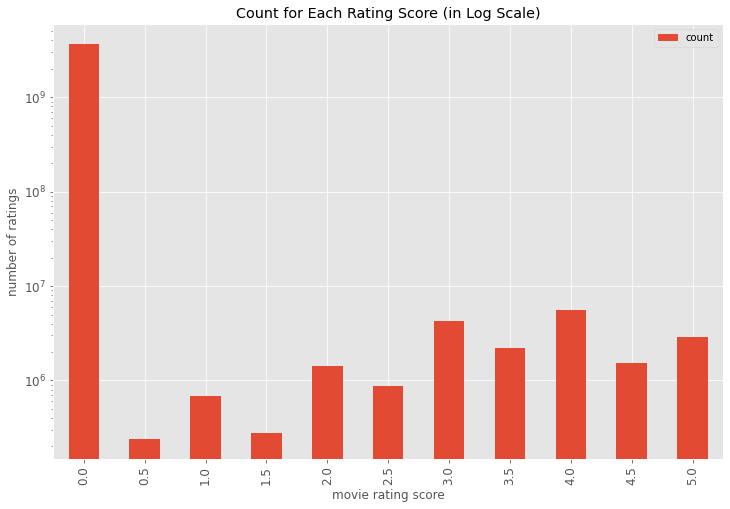

In [15]:
ax = df_ratings_cnt[['count']].reset_index().rename(columns={'index': 'rating score'}).plot(
    x='rating score',
    y='count',
    kind='bar',
    figsize=(12, 8),
    title='Count for Each Rating Score (in Log Scale)',
    logy=True,
    fontsize=12,
)
ax.set_xlabel("movie rating score")
ax.set_ylabel("number of ratings")

Text(0, 0.5, 'number of ratings')

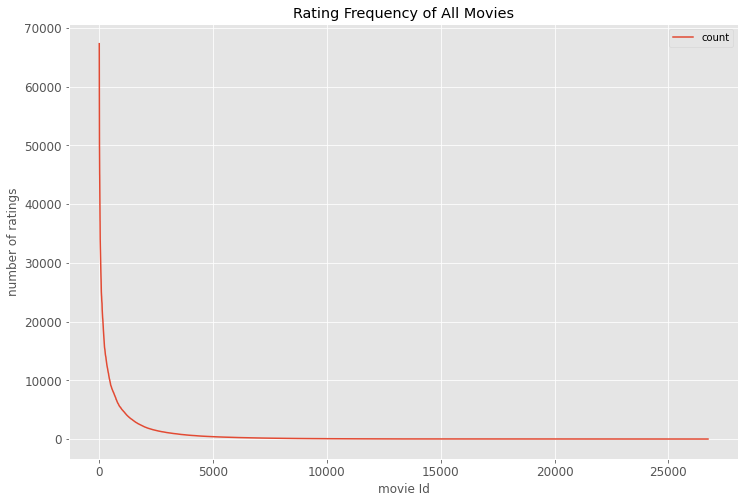

In [27]:
# plot rating frequency of all movies
ax = df_movies_cnt \
    .sort_values('count', ascending=False) \
    .reset_index(drop=True) \
    .plot(
        figsize=(12, 8),
        title='Rating Frequency of All Movies',
        fontsize=12
    )
ax.set_xlabel("movie Id")
ax.set_ylabel("number of ratings")

In [17]:
# get rating frequency
df_movies_cnt = pd.DataFrame(df_ratings.groupby('movieId').size(), columns=['count'])
df_movies_cnt.head()
df_movies_cnt['count'].quantile(np.arange(1, 0.6, -0.05))

1.00    67310.00
0.95     3612.95
0.90     1305.70
0.85      632.55
0.80      346.00
0.75      205.00
0.70      123.00
0.65       74.00
Name: count, dtype: float64

In [18]:
# filter data
popularity_thres = 50
popular_movies = list(set(df_movies_cnt.query('count >= @popularity_thres').index))
df_ratings_drop_movies = df_ratings[df_ratings.movieId.isin(popular_movies)]
print('shape of original ratings data: ', df_ratings.shape)
print('shape of ratings data after dropping unpopular movies: ', df_ratings_drop_movies.shape)

shape of original ratings data:  (20000263, 3)
shape of ratings data after dropping unpopular movies:  (19847947, 3)


In [19]:
# get number of ratings given by every user
df_users_cnt = pd.DataFrame(df_ratings_drop_movies.groupby('userId').size(), columns=['count'])
df_users_cnt.head()

,count
userId,
1,174
2,61
3,187
4,28
5,66


In [20]:
df_users_cnt['count'].quantile(np.arange(1, 0.5, -0.05))


1.00    6769.0
0.95     518.0
0.90     333.0
0.85     246.0
0.80     192.0
0.75     154.0
0.70     127.0
0.65     107.0
0.60      92.0
0.55      78.0
Name: count, dtype: float64

In [21]:
# filter data
ratings_thres = 50
active_users = list(set(df_users_cnt.query('count >= @ratings_thres').index))
df_ratings_drop_users = df_ratings_drop_movies[df_ratings_drop_movies.userId.isin(active_users)]
print('shape of original ratings data: ', df_ratings.shape)
print('shape of ratings data after dropping both unpopular movies and inactive users: ', df_ratings_drop_users.shape)

shape of original ratings data:  (20000263, 3)
shape of ratings data after dropping both unpopular movies and inactive users:  (18181935, 3)


In [22]:
# pivot and create movie-user matrix
movie_user_mat = df_ratings_drop_users.pivot(index='movieId', columns='userId', values='rating').fillna(0)
# create mapper from movie title to index
movie_to_idx = {
    movie: i for i, movie in 
    enumerate(list(df_movies.set_index('movieId').loc[movie_user_mat.index].title))
}
# transform matrix to scipy sparse matrix
movie_user_mat_sparse = csr_matrix(movie_user_mat.values)

In [23]:

# define model
model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
# fit
model_knn.fit(movie_user_mat_sparse)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [24]:
def fuzzy_matching(mapper, fav_movie, verbose=True):
    """
    return the closest match via fuzzy ratio. If no match found, return None
    
    Parameters
    ----------    
    mapper: dict, map movie title name to index of the movie in data

    fav_movie: str, name of user input movie
    
    verbose: bool, print log if True

    Return
    ------
    index of the closest match
    """
    match_tuple = []
    # get match
    for title, idx in mapper.items():
        ratio = fuzz.ratio(title.lower(), fav_movie.lower())
        if ratio >= 60:
            match_tuple.append((title, idx, ratio))
    # sort
    match_tuple = sorted(match_tuple, key=lambda x: x[2])[::-1]
    if not match_tuple:
        print('Oops! No match is found')
        return
    if verbose:
        print('Found possible matches in our database: {0}\n'.format([x[0] for x in match_tuple]))
    return match_tuple[0][1]



def make_recommendation(model_knn, data, mapper, fav_movie, n_recommendations):
    # fit
    model_knn.fit(data)
    # get input movie index
    print('You have input movie:', fav_movie)
    idx = fuzzy_matching(mapper, fav_movie, verbose=True)
    # inference
    print('Recommendation system start to make inference')
    print('......\n')
    distances, indices = model_knn.kneighbors(data[idx], n_neighbors=n_recommendations+1)
    # get list of raw idx of recommendations
    raw_recommends = \
        sorted(list(zip(indices.squeeze().tolist(), distances.squeeze().tolist())), key=lambda x: x[1])[:0:-1]
    # get reverse mapper
    reverse_mapper = {v: k for k, v in mapper.items()}
    # print recommendations
    print('Recommendations for {}:'.format(fav_movie))
    for i, (idx, dist) in enumerate(raw_recommends):
        print('{0}: {1}, with distance of {2}'.format(i+1, reverse_mapper[idx], dist))

In [26]:
my_favorite = 'Shawshank Redemption'

make_recommendation(
    model_knn=model_knn,
    data=movie_user_mat_sparse,
    fav_movie=my_favorite,
    mapper=movie_to_idx,
    n_recommendations=10)

You have input movie: Shawshank Redemption
Found possible matches in our database: ['Shawshank Redemption, The (1994)']

Recommendation system start to make inference
......

Recommendations for Shawshank Redemption:
1: Apollo 13 (1995), with distance of 0.36910879611968994
2: Fugitive, The (1993), with distance of 0.36736077070236206
3: Jurassic Park (1993), with distance of 0.3660138249397278
4: Seven (a.k.a. Se7en) (1995), with distance of 0.3532905578613281
5: Braveheart (1995), with distance of 0.3390269875526428
6: Schindler's List (1993), with distance of 0.3251813054084778
7: Usual Suspects, The (1995), with distance of 0.3173649311065674
8: Forrest Gump (1994), with distance of 0.2999572157859802
9: Silence of the Lambs, The (1991), with distance of 0.28041601181030273
10: Pulp Fiction (1994), with distance of 0.27168941497802734
